## LOAD the Data of one participant
in this part we will load the data of a single participant. 
Therefor we use the package 'nilearn' which is made for working with fMRI data in python
We first import some packages and an atlas (explanation later) 

In [1]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import nilearn
from nilearn import image
import numpy as np
from nilearn import plotting
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
from nilearn.input_data import NiftiMapsMasker
from nilearn.input_data import NiftiLabelsMasker
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = atlas.maps

C:\Users\User\Anaconda3\envs\neuroart_env\lib\site-packages\numpy\lib\npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


here we load the data (which needs to be in the same directory as the notebook or in a subfolder) 

In [34]:
# this is the data when a participant watches a movie in a scanner
data_base = nib.load('data/test_base.nii.gz')

# this is the data when a participant is anesthesized and "watches" a movie in a scanner 
data_anes = nib.load('data/test_anes.nii.gz')

we can first have a look on the dimensionality of the data

In [3]:
print('The dimeensionality is: {}'.format(data_base.shape))

The dimeensionality is: (64, 64, 33, 155)


we have a 4-dimensional dataset. fMRI data always has this dimensionality. It represents a 3D brain over time (4th dimension) 
Let's plot a single timestep fom this data

In [4]:
# select only the first timestep
first_rsn = image.index_img(data_base, 0)
print('The selected dimensionality is: {}'.format(first_rsn.shape))

The selected dimensionality is: (64, 64, 33)


You now only have one timestep in three dimensions. These dimensions are fiexed by the scanner resolution. Here you have 64x64x33 = 135168 small cubes of scanned brain tissue. Each hof this cubes has its own recorded activity. For our analysis, 135168 is much too high. Therefore, we project these so called "voxels" on an atlas. The job of the atlas is to tell me in which region each voxel belongs to. With this, I do not need to look on 135168 voxels, but can focus on the space-average of a few known brain areas. 

In [5]:
64*64*33 

135168

C:\Users\User\Anaconda3\envs\neuroart_env\lib\site-packages\nilearn\image\resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


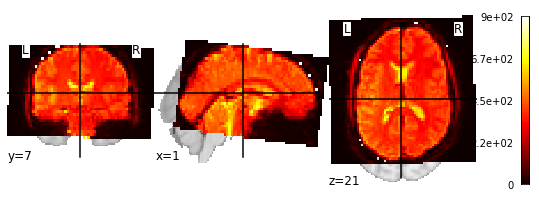

In [6]:
plotting.plot_stat_map(first_rsn)

In [7]:
# Loading atlas image stored in 'maps'
#atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']
mask = atlas.maps

In [8]:
# these are the names of the brain regions
labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

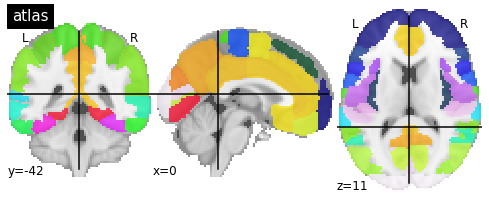

In [9]:
# and theses are their locations. Every voxel within one colored are gets averaged to a single value
plotting.plot_roi(mask, title="atlas")

In [10]:

masker = NiftiLabelsMasker(labels_img=mask, standardize=True,memory='nilearn_cache', verbose=10)


In [11]:
time_series_base= masker.fit_transform(data_base)
time_series_anes= masker.fit_transform(data_anes)
#time_series is now a 2D matrix, of shape (number of time points x number of regions)

[NiftiLabelsMasker.fit_transform] loading data from C:\Users\User/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
Resampling labels
[Memory]0.0s, 0.0min    : Loading filter_and_extract from nilearn_cache\joblib\nilearn\input_data\base_masker\filter_and_extract\16c18110f5b61809badd18962ff54ba1
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min
[NiftiLabelsMasker.fit_transform] loading data from C:\Users\User/nilearn_data\fsl\data\atlases\HarvardOxford\HarvardOxford-cort-maxprob-thr25-2mm.nii.gz
[Memory]0.5s, 0.0min    : Loading filter_and_extract from nilearn_cache\joblib\nilearn\input_data\base_masker\filter_and_extract\b94c729d7c8f9aac2dabd7430157c719
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


Instead of 135168 voxels we now have 47 brain regions and therir activity over 155 time steps. 

In [12]:
(time_series_base).shape

(155, 47)

## Do something with the data

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Text(0, 0.5, 'areas')

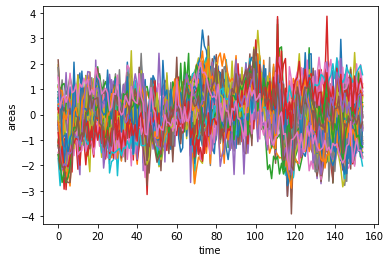

In [14]:
plt.plot(time_series_base)
plt.xlabel('time')
plt.ylabel('areas')

Lets try to only plot one region over time

Text(0, 0.5, 'area0')

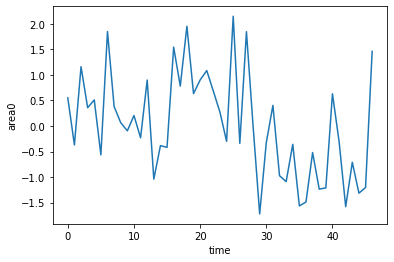

In [15]:
plt.plot(time_series_base[0])
plt.xlabel('time')
plt.ylabel('area0')

Further, I can for example visualize two brain areas in a scatter plot where one point is a moment in time


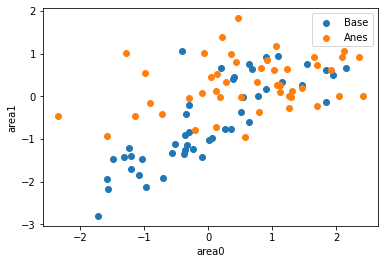

In [28]:
plt.scatter(time_series_base[0],time_series_base[1])
plt.scatter(time_series_anes[0],time_series_anes[1])
plt.xlabel('area0')
plt.ylabel('area1')
plt.legend(['Base','Anes'])

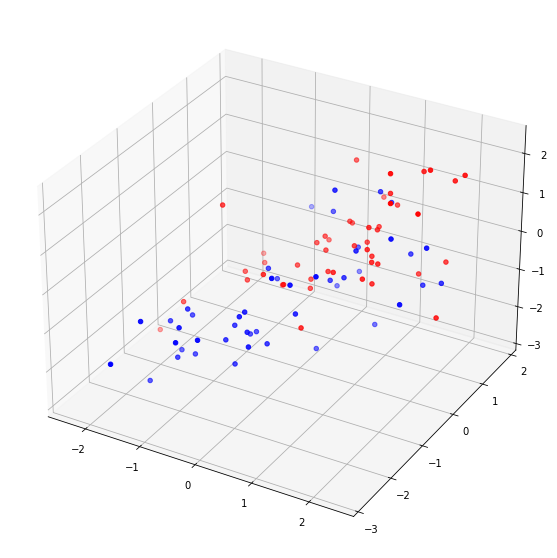

In [29]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(time_series_base[0],time_series_base[1],time_series_base[2],color='blue',marker='o')
ax.scatter(time_series_anes[0],time_series_anes[1],time_series_anes[2],color='red',marker ='o')

If I would plot this in a scatterplot I would have one axis per brain area. This is impossible to visualize. A Principal component analysis projects data on a lower-dimensional space by keeping most of its variance


In [17]:
# I want to extract 3 components to plot the data in a 3d space
# first initialize the pca
pca = PCA(n_components=3)


In [18]:
pca = pca.fit(time_series_base)
LD_base = pca.transform(time_series_base)

LD_base[:,:].shape

(155, 3)

C:\Users\User\Anaconda3\envs\neuroart_env\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


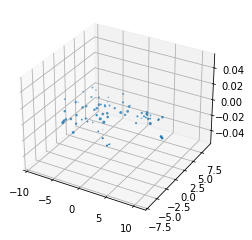

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(LD_base[:,0],LD_base[:,1],LD_base[:,2])

Now we see 155 time steps on 3 principal components that explain most of the datas variance

### Lets to this with baseline and anesthesia


In [20]:
# I want to extract 3 components to plot the data in a 3d space
# first initialize the pca
pca = PCA(n_components = 3)


In [21]:
# we put togeteher the baseline and anesthesia data 
#(0-155 = Base, 156- end = Anes)
X_combined = np.vstack((time_series_base,time_series_anes))
X_combined.shape


(310, 47)

In [22]:
pca = pca.fit(X_combined)
LD_combined = pca.transform(X_combined)

LD_combined[:,:].shape

(310, 3)

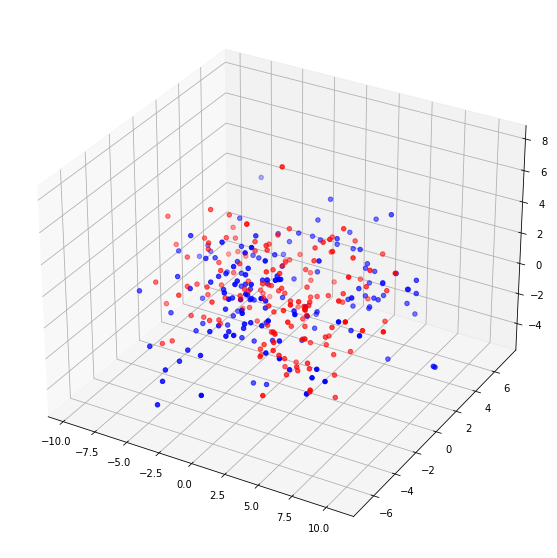

In [26]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(LD_combined[:155,0],LD_combined[:155,1],LD_combined[:155,2],color='blue',marker='o')
ax.scatter(LD_combined[155:,0],LD_combined[155:,1],LD_combined[155:,2],color='red',marker ='o')